In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc 
 

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
sns.set(font_scale=1.15)
sns.set_style("whitegrid")

In [5]:
# Create Connection String
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=172.26.29.140;'
                      'UID=wincrm360;'
                      'PWD=baac@mkt2019;'
                      'Database=CRMP1_ADSDT;'
                      'Trusted_Connection=no;')

In [25]:
pd.set_option('float_format', '{:f}'.format)

In [224]:
_strsql = "select * from  crmp1_adsdt.dbo.TMPP_BPAY_PREPAREED "
df_original = pd.read_sql(_strsql, conn)

print(df_original.shape)
df_original.head()

(714910, 27)


,GID,TARGET_NPL,CID,TYPE,SUBT,ACR,LOAN_AMT,CREDIT_LIMIT,PER_GAP_UTL,INT_RATE,...,TERM_MNTH,DEP_BAL,DEP_CNT_PRD,DEP_BAL_AVG3M,AGE_LNREG,MB_AMT_TOTAL,MB_AMT_AVG,MB_AMT_MIN,MB_AMT_MAX,MB_CNT_TXN
0,13757582,0,566354039722,8200,50001,572.622800,29500.000000,100000.000000,71.000000,6.500000,...,48,14762.780000,3.000000,14517.180000,20.000000,50.000000,50.000000,50.000000,50.000000,1
1,25036914,0,800336248006,7300,30001,0.396800,7916.650000,10000.000000,21.000000,1.200000,...,30,193.420000,1.000000,315.140000,1.000000,13046.000000,4348.666700,200.000000,12546.000000,3
2,244881,0,800310559277,8100,40001,1106.053100,49900.000000,50000.000000,0.000000,6.500000,...,60,1211.220000,1.000000,4191.360000,10.000000,77787.440000,2222.498300,5.000000,60000.000000,35
3,2793406,0,800353057290,8100,40001,2598.375300,448419.360000,500000.000000,10.000000,4.500000,...,120,18088.020000,2.000000,53552.733300,7.000000,137800.000000,13780.000000,2000.000000,50000.000000,10
4,28911650,0,800297273736,8100,40004,3186.851300,177249.640000,200000.000000,11.000000,8.750000,...,120,11899.570000,1.000000,7582.796700,3.000000,17650.000000,5883.333300,150.000000,10000.000000,3


In [225]:
df_original.columns

Index(['GID', 'TARGET_NPL', 'CID', 'TYPE', 'SUBT', 'ACR', 'LOAN_AMT',
       'CREDIT_LIMIT', 'PER_GAP_UTL', 'INT_RATE', 'DUIN', 'DUPR', 'LCHG',
       'AGE', 'AGE_CID', 'LAST_PAYMENT_DATE_DAY', 'FLAG_SUBPLAN', 'TERM_MNTH',
       'DEP_BAL', 'DEP_CNT_PRD', 'DEP_BAL_AVG3M', 'AGE_LNREG', 'MB_AMT_TOTAL',
       'MB_AMT_AVG', 'MB_AMT_MIN', 'MB_AMT_MAX', 'MB_CNT_TXN'],
      dtype='object')

In [230]:
df = df_original[['GID','TARGET_NPL', 'ACR', 'LOAN_AMT',
       'CREDIT_LIMIT', 'INT_RATE', 'DUIN', 'DUPR', 'LCHG', 'AGE', 'AGE_CID',
       'LAST_PAYMENT_DATE_DAY', 'FLAG_SUBPLAN', 'TERM_MNTH', 'DEP_BAL',
       'DEP_CNT_PRD', 'DEP_BAL_AVG3M', 'AGE_LNREG','PER_GAP_UTL','MB_AMT_TOTAL',
       'MB_AMT_AVG', 'MB_AMT_MIN', 'MB_AMT_MAX', 'MB_CNT_TXN']][df_original['AGE_LNREG']>=0]

In [227]:
df.head()

,GID,TARGET_NPL,ACR,LOAN_AMT,CREDIT_LIMIT,INT_RATE,DUIN,DUPR,LCHG,AGE,...,DEP_BAL,DEP_CNT_PRD,DEP_BAL_AVG3M,AGE_LNREG,PER_GAP_UTL,MB_AMT_TOTAL,MB_AMT_AVG,MB_AMT_MIN,MB_AMT_MAX,MB_CNT_TXN
0,13757582,0,572.622800,29500.000000,100000.000000,6.500000,0.000000,0.000000,0.000000,43,...,14762.780000,3.000000,14517.180000,20.000000,71.000000,50.000000,50.000000,50.000000,50.000000,1
10,15924563,0,1157.534300,50000.000000,150000.000000,6.500000,0.000000,0.000000,0.000000,47,...,175614.170000,2.000000,171766.143300,10.000000,67.000000,55575.000000,27787.500000,5575.000000,50000.000000,2
11,31373886,0,5850.408600,200000.000000,200000.000000,6.500000,0.000000,0.000000,0.000000,31,...,1327.320000,2.000000,2987.450000,4.000000,0.000000,37040.000000,2849.230800,140.000000,5900.000000,13
13,15765491,0,2598.780300,199906.160000,200000.000000,6.500000,0.000000,0.000000,0.000000,59,...,99508.340000,1.000000,62198.586700,24.000000,0.000000,68206.280000,3410.314000,200.000000,25200.000000,20
19,16123514,0,5206.744400,49895.620000,150000.000000,9.500000,0.000000,0.000000,0.000000,50,...,9788.410000,2.000000,13967.233300,16.000000,67.000000,137000.000000,8058.823500,500.000000,46000.000000,17


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293448 entries, 0 to 714908
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   GID                    293448 non-null  object 
 1   TARGET_NPL             293448 non-null  int64  
 2   ACR                    293448 non-null  float64
 3   LOAN_AMT               293448 non-null  float64
 4   CREDIT_LIMIT           293448 non-null  float64
 5   INT_RATE               293448 non-null  float64
 6   DUIN                   293448 non-null  float64
 7   DUPR                   293448 non-null  float64
 8   LCHG                   293448 non-null  float64
 9   AGE                    293448 non-null  int64  
 10  AGE_CID                293448 non-null  int64  
 11  LAST_PAYMENT_DATE_DAY  293448 non-null  int64  
 12  FLAG_SUBPLAN           293448 non-null  int64  
 13  TERM_MNTH              293448 non-null  int64  
 14  DEP_BAL                293425 non-nu

In [59]:
df.describe()

,TARGET_NPL,ACR,LOAN_AMT,CREDIT_LIMIT,INT_RATE,DUIN,DUPR,LCHG,AGE,AGE_CID,LAST_PAYMENT_DATE_DAY,FLAG_SUBPLAN,TERM_MNTH,DEP_BAL,DEP_CNT_PRD,DEP_BAL_AVG3M,AGE_LNREG,PER_GAP_UTL
count,34052.000000,34052.000000,34052.000000,34052.000000,34052.000000,34052.000000,34052.000000,34052.000000,34052.000000,34052.000000,34052.000000,34052.000000,34052.000000,33185.000000,33185.000000,33185.000000,34052.000000,34052.000000
mean,0.138112,23019.131544,229015.133252,303857.386248,7.068638,8716.313741,5036.925738,710.763949,56.709944,84.870610,549.672560,0.644456,127.156760,23554.820336,1.856351,24861.669651,19.125514,27.347645
std,0.345023,59300.623980,267806.675820,311389.535694,0.965685,44466.200087,51538.096732,7073.047093,10.583571,42.369923,492.342299,0.478685,35.567029,89536.607652,0.781526,88143.836149,10.084270,24.666243
min,0.000000,0.000000,15.790000,5500.000000,1.500000,0.000000,0.000000,0.000000,23.000000,8.000000,218.000000,0.000000,9.000000,0.000000,0.000000,0.010000,0.000000,0.000000
25%,0.000000,1669.574775,81414.527500,150000.000000,6.500000,0.000000,0.000000,0.000000,49.000000,51.000000,253.000000,0.000000,120.000000,1594.830000,1.000000,2504.703300,11.000000,7.000000
50%,0.000000,5482.743050,149542.805000,200000.000000,6.500000,0.000000,0.000000,0.000000,56.000000,82.000000,315.000000,1.000000,120.000000,5614.430000,2.000000,7212.406700,18.000000,21.000000
75%,0.000000,21524.021175,274236.577500,350000.000000,7.250000,0.000000,0.000000,0.000000,64.000000,113.000000,629.000000,1.000000,132.000000,17368.150000,2.000000,20022.206700,27.000000,43.000000
max,1.000000,2760170.561300,6200000.000000,6200000.000000,13.000000,2728600.150000,4248184.470000,500935.460000,96.000000,250.000000,3337.000000,1.000000,1320.000000,5569464.850000,5.000000,5952440.213300,61.000000,100.000000


<ipython-input-231-cba4fae2eeb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['TARGET_NPL'] = np.where(df_target['TARGET_NPL']==1,'Bad','Good')


Good    698511
Bad      11719
Name: TARGET_NPL, dtype: int64
****************************************
Good   98.349971
Bad     1.650029
Name: TARGET_NPL, dtype: float64
****************************************


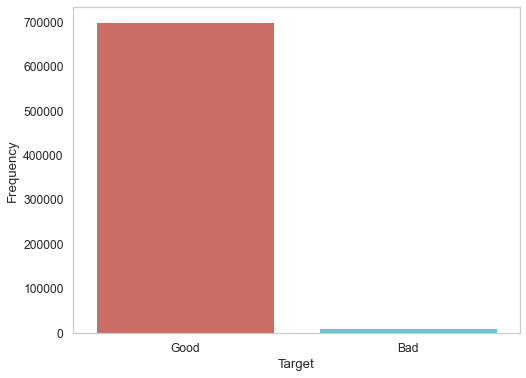

Imbalance Ratio (IR) = 1:59


In [231]:
df_target = df[['TARGET_NPL']]
df_target['TARGET_NPL'] = np.where(df_target['TARGET_NPL']==1,'Bad','Good')

print(df_target['TARGET_NPL'].value_counts())
print('*'*40)
print(df_target['TARGET_NPL'].value_counts()/len(df_target)*100)
print('*'*40)

fig = plt.figure(figsize=(8,6))
sns.countplot(x='TARGET_NPL',data=df_target, palette='hls')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.grid(False)
plt.show();

## IR = (negative_class/positive_class)
## Where positive_class is the number of minority class samples and negative_class is the number of majority class samples

count_good = len(df_target.loc[df_target['TARGET_NPL']=='Good'])
count_bad = len(df_target.loc[df_target['TARGET_NPL']=='Bad'])

print("Imbalance Ratio (IR) = 1:{}".format(int(count_good/count_bad)))

In [30]:
df.describe()

,TARGET_NPL,ACR,LOAN_AMT,CREDIT_LIMIT,INT_RATE,DUIN,DUPR,LCHG,AGE,AGE_CID,LAST_PAYMENT_DATE_DAY,FLAG_SUBPLAN,TERM_MNTH,DEP_BAL,DEP_CNT_PRD,DEP_BAL_AVG3M,AGE_LNREG
count,1197893.000000,1197893.000000,1197893.000000,1197893.000000,1197893.000000,1197893.000000,1197893.000000,1197893.000000,1197893.000000,1197893.000000,1197893.000000,1197893.000000,1197893.000000,1134537.000000,1134537.000000,1134537.000000,1197893.000000
mean,0.182179,12718.137031,118325.368542,190442.422456,6.507510,6159.955102,5891.180260,885.786473,54.482196,63.187432,547.246929,0.503299,51.140350,21299.936925,1.770535,22600.217246,16.590834
std,0.385992,69576.028836,274544.711537,438593.361626,2.112545,62457.920484,66466.907371,10593.447613,11.255611,41.867791,493.286165,0.499989,54.701419,237245.196959,0.774222,236295.828693,10.614405
min,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000,0.000000,0.000000,5.000000,8.000000,218.000000,0.000000,1.000000,0.000000,0.000000,0.010000,0.000000
25%,0.000000,593.437100,37406.580000,50000.000000,6.500000,0.000000,0.000000,0.000000,47.000000,30.000000,251.000000,0.000000,12.000000,1074.420000,1.000000,1755.610000,8.000000
50%,0.000000,2342.806200,50000.000000,100000.000000,6.500000,0.000000,0.000000,0.000000,54.000000,57.000000,322.000000,1.000000,24.000000,4281.580000,2.000000,5637.420000,15.000000
75%,0.000000,9196.166900,120000.000000,200000.000000,7.250000,0.000000,0.000000,0.000000,62.000000,80.000000,644.000000,1.000000,72.000000,14015.310000,2.000000,16350.553300,26.000000
max,1.000000,24418304.823100,81000000.000000,81000000.000000,19.000000,23857502.080000,14000000.000000,3931525.060000,100.000000,559.000000,3337.000000,1.000000,2880.000000,196296264.750000,8.000000,196434553.583300,68.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


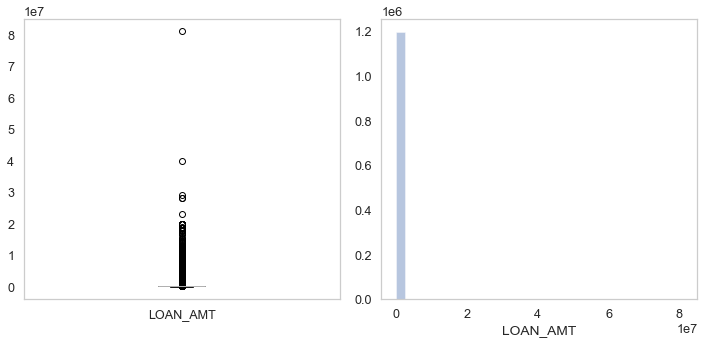

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(10,5))

df.boxplot(column=['LOAN_AMT'], ax=ax1)
sns.distplot(df['LOAN_AMT'], kde=False, bins=30, ax=ax2)

plt.tight_layout()
ax1.grid(False)
ax2.grid(False)
plt.grid(False)
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


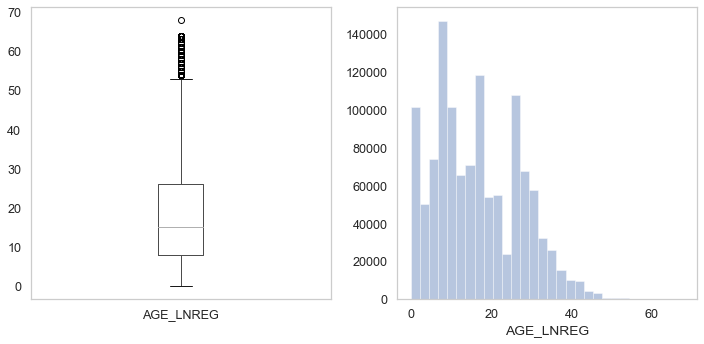

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(10,5))

df.boxplot(column=['AGE_LNREG'], ax=ax1)
sns.distplot(df['AGE_LNREG'], kde=False, bins=30, ax=ax2)

plt.tight_layout()
ax1.grid(False)
ax2.grid(False)
plt.grid(False)
plt.show();

In [203]:
FeatureSel = 'LOAN_AMT'
df_age = df[['TARGET_NPL', FeatureSel]]
df_age['bin_'+FeatureSel] = pd.qcut(df_age[FeatureSel].astype(float), q=5, duplicates='drop', precision=0)
#df_age['bin_'+FeatureSel] = pd.cut(df_age[FeatureSel].astype(float), bins=ranges, labels=labels)

df_age = df_age.groupby('bin_'+FeatureSel).agg({'TARGET_NPL': ['count', 'sum']})
df_age.columns = df_age.columns.map('_'.join)
df_age['dist'] = df_age['TARGET_NPL_count']/df_age['TARGET_NPL_count'].sum()
df_age['bad_rate'] = df_age['TARGET_NPL_sum']/df_age['TARGET_NPL_count']
df_age = df_age.reset_index()
df_age

<ipython-input-203-c6495decbd7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['bin_'+FeatureSel] = pd.qcut(df_age[FeatureSel].astype(float), q=5, duplicates='drop', precision=0)


,bin_LOAN_AMT,TARGET_NPL_count,TARGET_NPL_sum,dist,bad_rate
0,"(-1.0, 35000.0]",111242,17388,0.202327,0.156308
1,"(35000.0, 49819.0]",108683,7115,0.197673,0.065466
2,"(49819.0, 69989.0]",109963,17496,0.200001,0.159108
3,"(69989.0, 117000.0]",110000,16240,0.200068,0.147636
4,"(117000.0, 20000000.0]",109925,14204,0.199932,0.129215


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

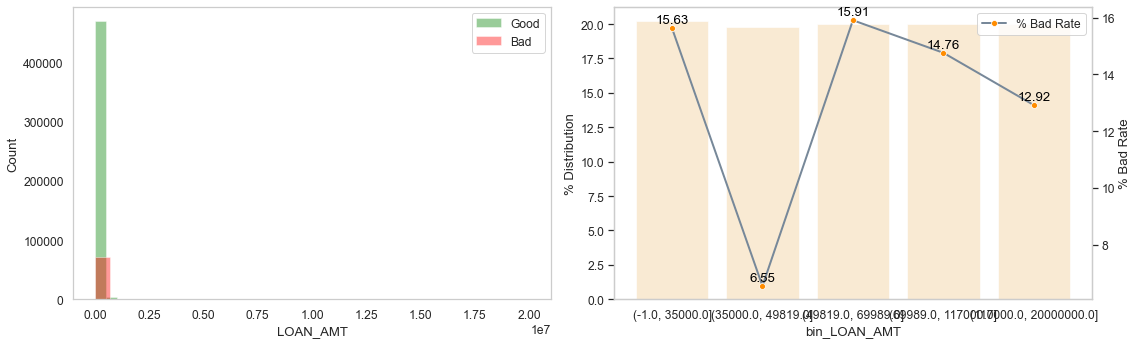

In [204]:
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(16,5))

### First figure is distribution plot ###

sns.distplot(df.loc[df['TARGET_NPL'] == 0, FeatureSel], kde=False, bins=40,
            label = 'Good', color = 'green', ax = ax[0])
sns.distplot(df.loc[df['TARGET_NPL'] == 1, FeatureSel], kde=False, bins=20,
             label = 'Bad', color = 'red', ax = ax[0])

### Second figure is bar plot + line chart ###

### y axis (left) is bar plot ###
sns.barplot(df_age['bin_'+FeatureSel], df_age['dist']*100, data = df_age, color='navajowhite', alpha=.6,
            ax = ax[1])

### y axis (right) is line chart ###
ax2 = ax[1].twinx()
ax2 = sns.lineplot(data=df_age, x=df_age.index, y=df_age['bad_rate']*100\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=6, color='lightslategray', 
                  linewidth=2, label='% Bad Rate')
for x,y in zip(df_age.index, df_age['bad_rate']*100):
          label = "{:.2f}".format(y)
          plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 

ax[0].legend()
ax[0].grid(False)
ax[1].grid(False)
ax2.grid(False)
ax[0].set_ylabel('Count')
ax[1].set_ylabel('% Distribution')
ax2.set_ylabel('% Bad Rate')
plt.tight_layout() 
plt.show();

## ตัวอย่างการสร้าง Bin

In [129]:
ranges = [-1, 7, 9, np.inf]  # np.inf for infinity
labels = ['0-49k', '50-70k', '70k-100k', '>100k']

FeatureSel = 'INT_RATE'
df_age = df[['TARGET_NPL', FeatureSel]]
#df_age['bin_'+FeatureSel] = pd.qcut(df_age[FeatureSel].astype(float), q=5, duplicates='drop', precision=0)
df_age['bin_'+FeatureSel] = pd.cut(df_age[FeatureSel].astype(float), bins=ranges)

df_age = df_age.groupby('bin_'+FeatureSel).agg({'TARGET_NPL': ['count', 'sum']})
df_age.columns = df_age.columns.map('_'.join)
df_age['dist'] = df_age['TARGET_NPL_count']/df_age['TARGET_NPL_count'].sum()
df_age['bad_rate'] = df_age['TARGET_NPL_sum']/df_age['TARGET_NPL_count']
df_age = df_age.reset_index()
df_age

<ipython-input-129-190a46d8c2a8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['bin_'+FeatureSel] = pd.cut(df_age[FeatureSel].astype(float), bins=ranges)


,bin_INT_RATE,TARGET_NPL_count,TARGET_NPL_sum,dist,bad_rate
0,"(-1.0, 7.0]",352844,31485,0.641753,0.089232
1,"(7.0, 9.0]",145674,22556,0.264952,0.154839
2,"(9.0, inf]",51295,18402,0.093295,0.358748


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

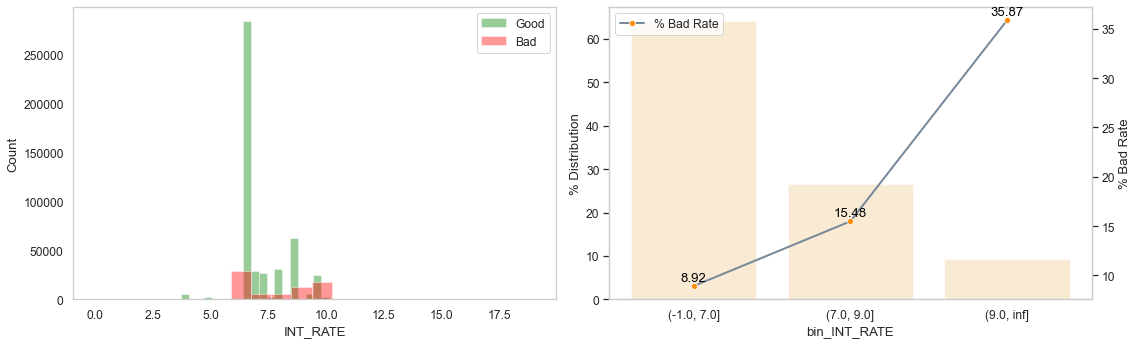

In [130]:
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(16,5))

### First figure is distribution plot ###

sns.distplot(df.loc[df['TARGET_NPL'] == 0, FeatureSel], kde=False, bins=40,
            label = 'Good', color = 'green', ax = ax[0])
sns.distplot(df.loc[df['TARGET_NPL'] == 1, FeatureSel], kde=False, bins=20,
             label = 'Bad', color = 'red', ax = ax[0])

### Second figure is bar plot + line chart ###

### y axis (left) is bar plot ###
sns.barplot(df_age['bin_'+FeatureSel], df_age['dist']*100, data = df_age, color='navajowhite', alpha=.6,
            ax = ax[1])

### y axis (right) is line chart ###
ax2 = ax[1].twinx()
ax2 = sns.lineplot(data=df_age, x=df_age.index, y=df_age['bad_rate']*100\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=6, color='lightslategray', 
                  linewidth=2, label='% Bad Rate')
for x,y in zip(df_age.index, df_age['bad_rate']*100):
          label = "{:.2f}".format(y)
          plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 

ax[0].legend()
ax[0].grid(False)
ax[1].grid(False)
ax2.grid(False)
ax[0].set_ylabel('Count')
ax[1].set_ylabel('% Distribution')
ax2.set_ylabel('% Bad Rate')
plt.tight_layout() 
plt.show();

## ประมวลผลทุก Feature ที่ประเภทข้อมูลเป็นตัวเลข

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


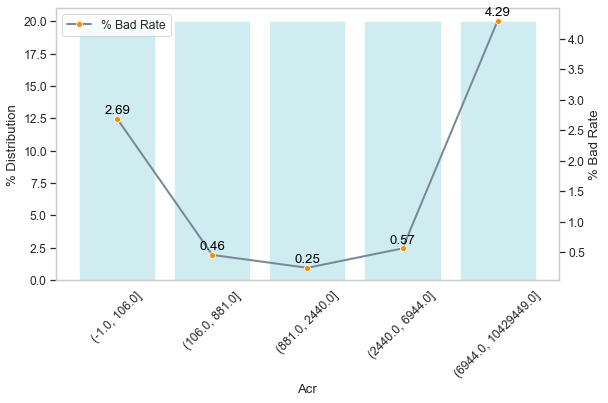

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


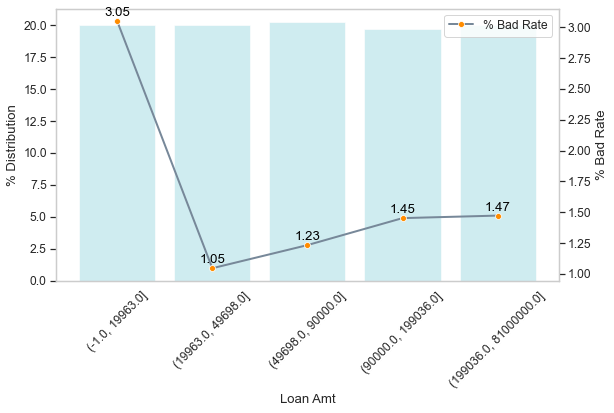

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


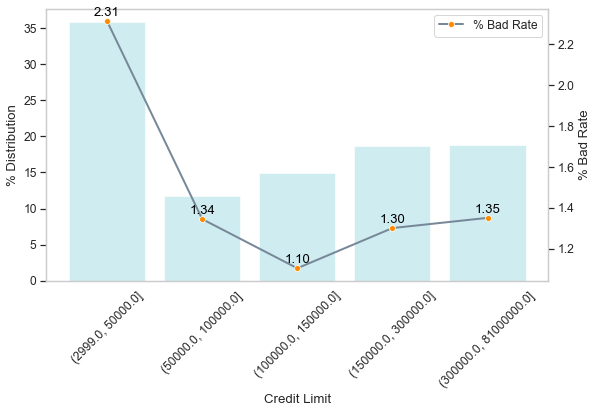

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


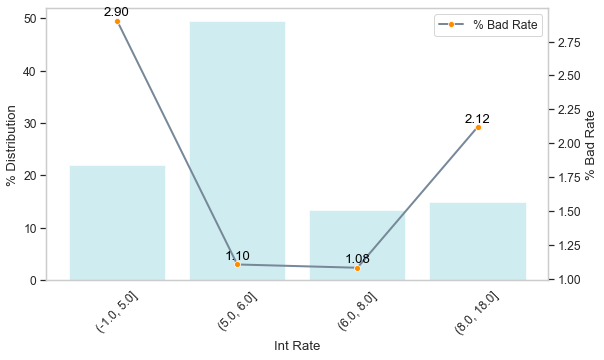

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


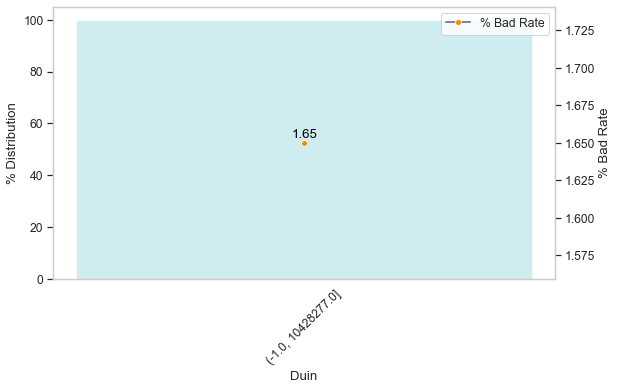

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


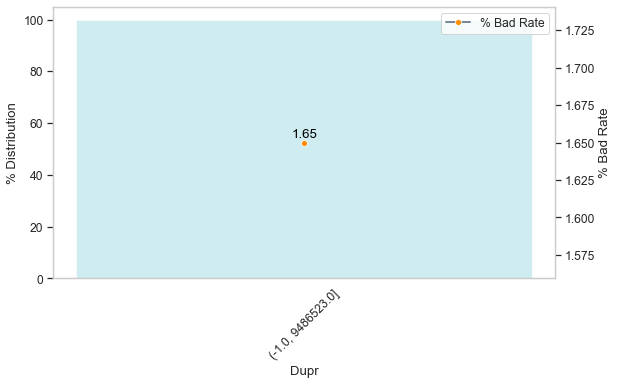

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


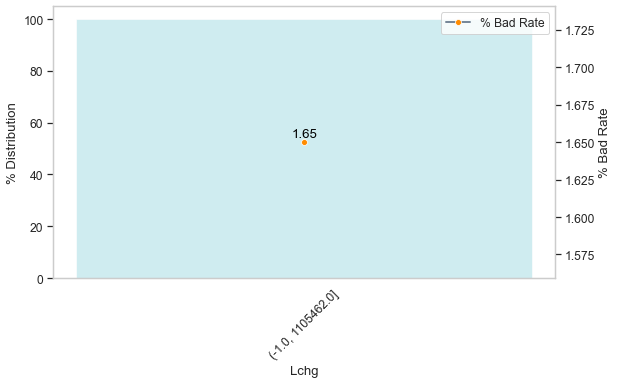

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


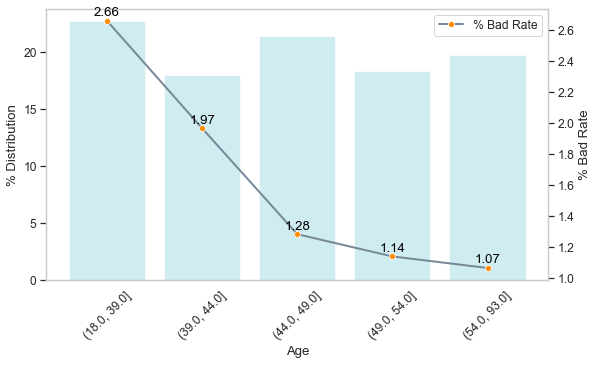

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


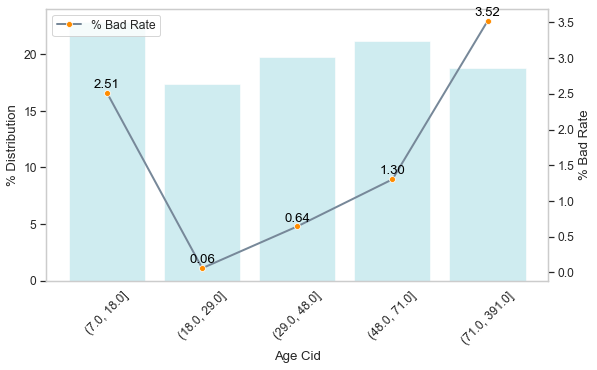

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


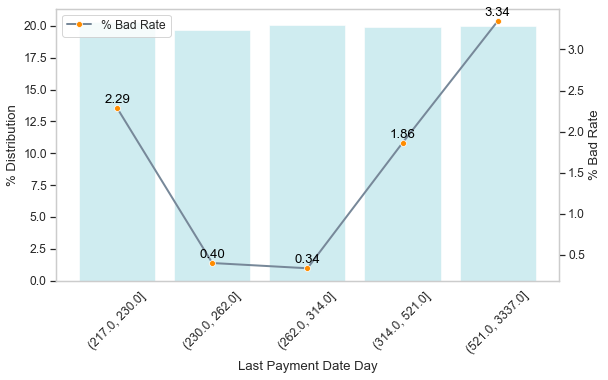

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


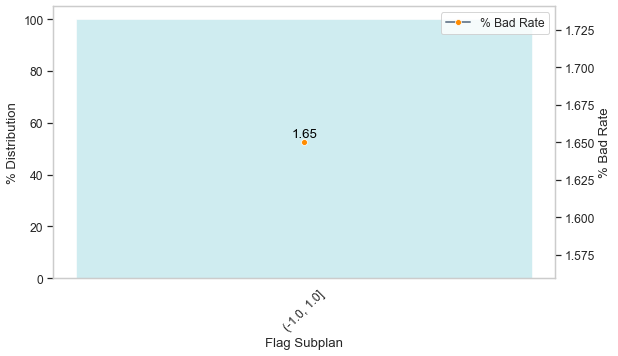

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


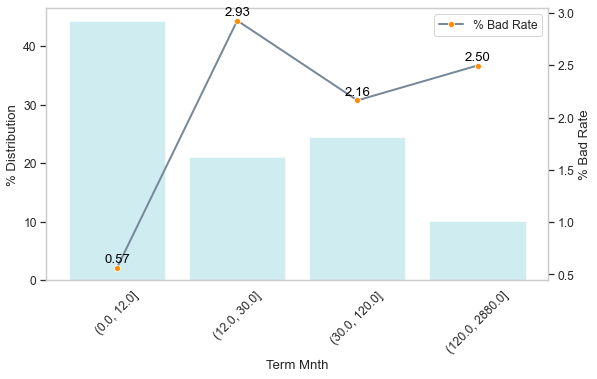

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


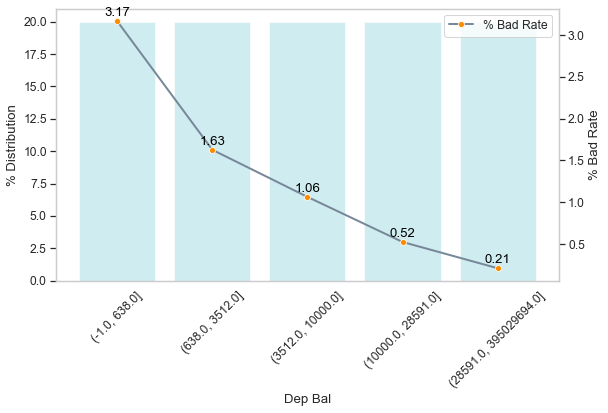

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


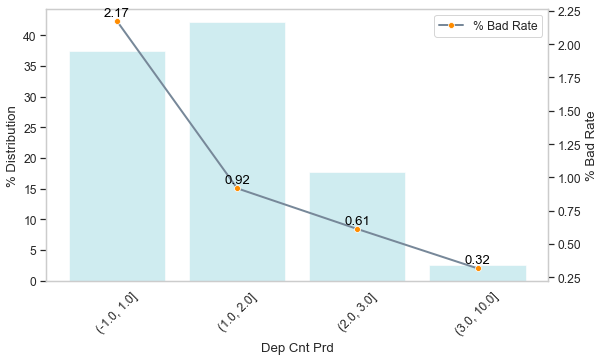

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


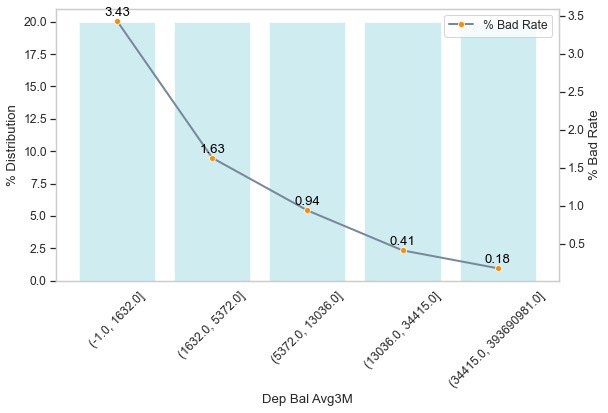

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


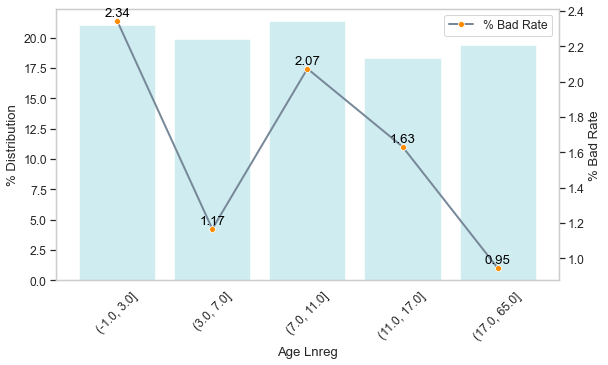

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


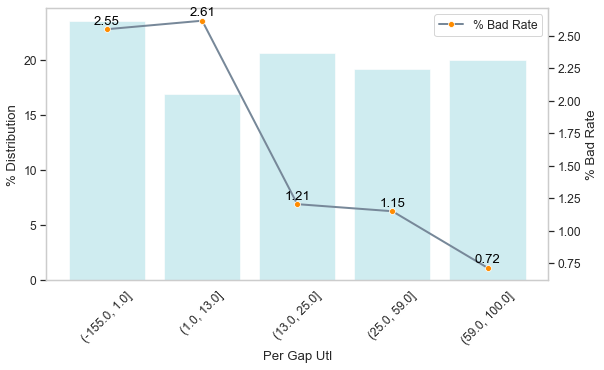

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


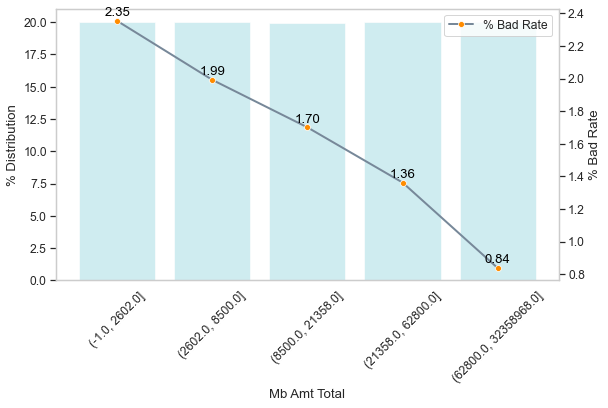

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


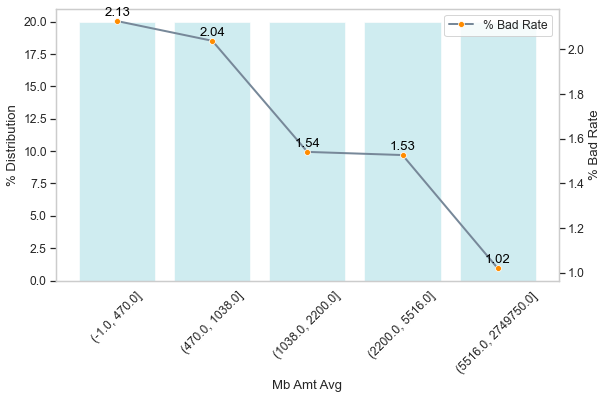

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


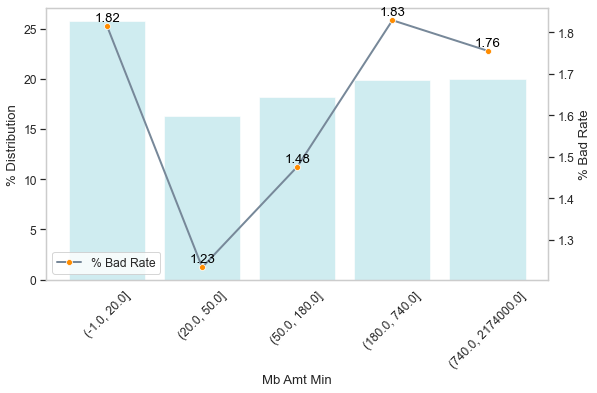

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


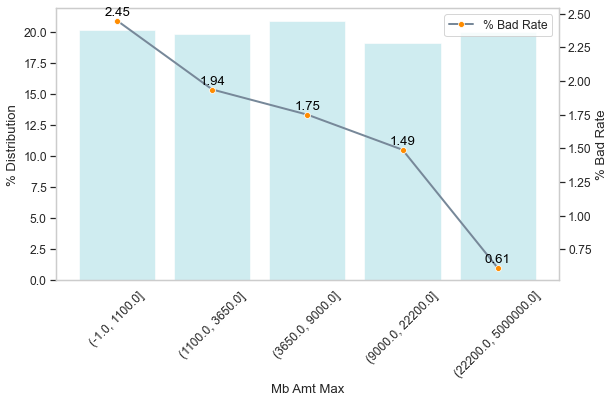

<ipython-input-232-ceae701fd052>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


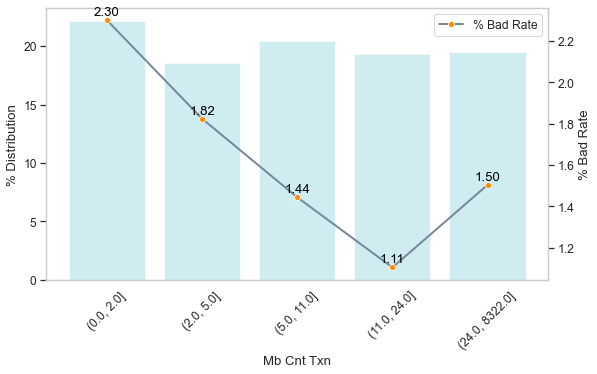

In [232]:
df_plot = df.copy()

for i in df_plot._get_numeric_data().columns:
  if i == 'TARGET_NPL':
    pass
  else:

    ### Generate dataframe for visualization ###

    df_group = df_plot[['TARGET_NPL', i]]
 
    df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)

    df_group = df_group.groupby('bin_'+i).agg({'TARGET_NPL': ['count', 'sum']})
    df_group.columns = df_group.columns.map('_'.join)
    df_group['dist'] = df_group['TARGET_NPL_count']/df_group['TARGET_NPL_count'].sum()
    df_group['bad_rate'] = df_group['TARGET_NPL_sum']/df_group['TARGET_NPL_count']
    df_group = df_group.reset_index()
 
    x1 = df_group['bin_'+i].astype(str)
    x2 = df_group.index
    y1 = df_group['dist']*100
    y2 = df_group['bad_rate']*100

    sns.set(font_scale=1.1)
    sns.set_style("whitegrid")
    fig, ax1  = plt.subplots(figsize=(9,5))
    plt.tick_params(axis='x', rotation = 45)

    ### y axis (left) is bar plot ###

    ax1.bar(x1,y1, data = df_group, color='powderblue', alpha=.6)

    ### y axis (right) is line chart ###
    ax2 = ax1.twinx()
    ax2 = sns.lineplot(x2, y2, data = df_group, marker='o',\
                    markerfacecolor='darkorange', markersize=6, color='lightslategray', 
                    linewidth=2, label='% Bad Rate')
    ax1.set_xlabel(i.replace("_"," ").title())
    ax1.set_ylabel('% Distribution')
    ax2.set_ylabel('% Bad Rate')
    ax1.grid(False)
    ax2.grid(False)

    for x,y in zip(x2,y2):
            label = "{:.2f}".format(y)
            plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 


    plt.show();


## Weight of Evidence (WOE) & Information Value (IV)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3916002 entries, 0 to 3916001
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   GID                    object 
 1   BAL                    object 
 2   CRLMT_CID              float64
 3   ACR                    object 
 4   INT_RATE               float64
 5   DUIN                   object 
 6   DUPR                   object 
 7   LCHG                   object 
 8   AGE                    int64  
 9   AGE_CID                int64  
 10  LAST_PAYMENT_DATE_DAY  int64  
 11  FLAG_SUBPLAN           int64  
 12  TERM_MNTH              float64
 13  DEP_BAL                float64
 14  DEP_CNT_PRD            float64
 15  TARGET_NPL             int64  
 16  PER_GAP_UTL            float64
 17  LOAN_AMT               float64
dtypes: float64(7), int64(5), object(6)
memory usage: 537.8+ MB


## เลือก Feature ที่สนใจ

In [64]:
df.columns

Index(['GID', 'TARGET_NPL', 'ACR', 'LOAN_AMT', 'CREDIT_LIMIT', 'INT_RATE',
       'DUIN', 'DUPR', 'LCHG', 'AGE', 'AGE_CID', 'LAST_PAYMENT_DATE_DAY',
       'FLAG_SUBPLAN', 'TERM_MNTH', 'DEP_BAL', 'DEP_CNT_PRD', 'DEP_BAL_AVG3M',
       'AGE_LNREG', 'PER_GAP_UTL'],
      dtype='object')

In [134]:
dfm=df[['TARGET_NPL','ACR','LOAN_AMT','CREDIT_LIMIT','INT_RATE','AGE_CID','LAST_PAYMENT_DATE_DAY','TERM_MNTH','DEP_BAL','DEP_CNT_PRD','DEP_BAL_AVG3M','PER_GAP_UTL']]

In [135]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549813 entries, 1 to 1200730
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TARGET_NPL             549813 non-null  int64  
 1   ACR                    549813 non-null  float64
 2   LOAN_AMT               549813 non-null  float64
 3   CREDIT_LIMIT           549813 non-null  float64
 4   INT_RATE               549813 non-null  float64
 5   AGE_CID                549813 non-null  int64  
 6   LAST_PAYMENT_DATE_DAY  549813 non-null  int64  
 7   TERM_MNTH              549813 non-null  int64  
 8   DEP_BAL                537604 non-null  float64
 9   DEP_CNT_PRD            537604 non-null  float64
 10  DEP_BAL_AVG3M          537604 non-null  float64
 11  PER_GAP_UTL            549813 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 70.7 MB


In [136]:
# funtion สำหรับเติม Missing Value
# ถ้าเป็น Category จะเติม Unidentified 
def fill_missing(df):

  for col in df.columns: 
    if  df[col].dtypes == np.object : 
      df[col] = df[col].fillna(value='Unidentified')
      
    elif df[col].dtypes == np.number:
      df[col] = df[col].fillna(df[col].median()) 

  return df

In [137]:
df_clean = fill_missing(dfm)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549813 entries, 1 to 1200730
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TARGET_NPL             549813 non-null  int64  
 1   ACR                    549813 non-null  float64
 2   LOAN_AMT               549813 non-null  float64
 3   CREDIT_LIMIT           549813 non-null  float64
 4   INT_RATE               549813 non-null  float64
 5   AGE_CID                549813 non-null  int64  
 6   LAST_PAYMENT_DATE_DAY  549813 non-null  int64  
 7   TERM_MNTH              549813 non-null  int64  
 8   DEP_BAL                549813 non-null  float64
 9   DEP_CNT_PRD            549813 non-null  float64
 10  DEP_BAL_AVG3M          549813 non-null  float64
 11  PER_GAP_UTL            549813 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 70.7 MB


<ipython-input-136-7d397403fb72>:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if  df[col].dtypes == np.object :
<ipython-input-136-7d397403fb72>:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  elif df[col].dtypes == np.number:
<ipython-input-136-7d397403fb72>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())


In [138]:
df_clean.head()

,TARGET_NPL,ACR,LOAN_AMT,CREDIT_LIMIT,INT_RATE,AGE_CID,LAST_PAYMENT_DATE_DAY,TERM_MNTH,DEP_BAL,DEP_CNT_PRD,DEP_BAL_AVG3M,PER_GAP_UTL
1,1,50907.315500,149919.180000,150000.000000,8.500000,62,1589,12,2030.390000,1.000000,2029.883300,0.000000
3,1,10055.118200,39700.000000,250000.000000,6.500000,80,1697,16,15913.970000,2.000000,15442.726700,84.000000
6,1,25388.010900,100000.000000,150000.000000,6.500000,86,2061,24,3670.990000,1.000000,3669.450000,33.000000
14,1,52517.672400,120000.000000,170000.000000,6.500000,83,1588,12,4101.190000,2.000000,4752.056700,29.000000
15,1,54043.485700,65000.000000,70000.000000,9.500000,128,503,48,98.090000,1.000000,98.030000,7.000000


In [144]:
# แบ่ง Bin 
def binning_numeric_standard(df):
  
  for i in df._get_numeric_data().columns:
    if i == 'TARGET_NPL':
      continue
    else:
      df[i] = pd.qcut(df[i].astype(float), q=5, duplicates='drop', precision=0).astype('object')

  return df_clean


In [145]:
# แบ่ง Bin 
def binning_numeric_modified(df):
  
  for i in df._get_numeric_data().columns:
    if i == 'TARGET_NPL':
          continue
    elif i=='CREDIT_LIMIT':
          df[i] = pd.qcut(df[i].astype(float), q=4, duplicates='drop', precision=0).astype('object')
    elif i=='LOAN_AMT':
          ranges = [-1, 45000, 150000,200000, np.inf] 
          df[i] = pd.cut(df[i].astype(float), bins=ranges, duplicates='drop', precision=0).astype('object')   
    elif i=='INT_RATE':
          ranges = [-1, 7, 9, np.inf]  
          df[i] = pd.cut(df[i].astype(float), bins=ranges, duplicates='drop', precision=0).astype('object')              
    else:
          df[i] = pd.qcut(df[i].astype(float), q=5, duplicates='drop', precision=0).astype('object')

    #if i == 'TARGET_NPL':
    #  continue
    #elif i == 'LOAN_AMT':
    #     df[i] = pd.qcut(df[i].astype(float), q=3, duplicates='drop', precision=0).astype('object')
    #else:
    #     df[i] = pd.qcut(df[i].astype(float), q=5, duplicates='drop', precision=0).astype('object')

  return df_clean

In [146]:
df_bin = binning_numeric_modified(df_clean)
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549813 entries, 1 to 1200730
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   TARGET_NPL             549813 non-null  int64   
 1   ACR                    549813 non-null  object  
 2   LOAN_AMT               549813 non-null  category
 3   CREDIT_LIMIT           549813 non-null  category
 4   INT_RATE               549813 non-null  category
 5   AGE_CID                549813 non-null  object  
 6   LAST_PAYMENT_DATE_DAY  549813 non-null  object  
 7   TERM_MNTH              549813 non-null  object  
 8   DEP_BAL                549813 non-null  object  
 9   DEP_CNT_PRD            549813 non-null  object  
 10  DEP_BAL_AVG3M          549813 non-null  object  
 11  PER_GAP_UTL            549813 non-null  object  
dtypes: category(3), int64(1), object(8)
memory usage: 59.6+ MB


In [147]:
df_woe = df_bin.copy()
df_woe.head()

,TARGET_NPL,ACR,LOAN_AMT,CREDIT_LIMIT,INT_RATE,AGE_CID,LAST_PAYMENT_DATE_DAY,TERM_MNTH,DEP_BAL,DEP_CNT_PRD,DEP_BAL_AVG3M,PER_GAP_UTL
1,1,"(13025.0, 16468423.0]","(45000.0, 150000.0]","(100000.0, 150000.0]","(7.0, 9.0]","(56.0, 71.0]","(863.0, 3337.0]","(0.0, 12.0]","(877.0, 3034.0]","(-1.0, 1.0]","(1548.0, 4162.0]","(-4999901.0, 3.0]"
3,1,"(4184.0, 13025.0]","(-1.0, 45000.0]","(200000.0, 40000000.0]","(-1.0, 7.0]","(71.0, 83.0]","(863.0, 3337.0]","(14.0, 480.0]","(6831.0, 17989.0]","(1.0, 2.0]","(8476.0, 20567.0]","(75.0, 100.0]"
6,1,"(13025.0, 16468423.0]","(45000.0, 150000.0]","(100000.0, 150000.0]","(-1.0, 7.0]","(83.0, 523.0]","(863.0, 3337.0]","(14.0, 480.0]","(3034.0, 6831.0]","(-1.0, 1.0]","(1548.0, 4162.0]","(3.0, 36.0]"
14,1,"(13025.0, 16468423.0]","(45000.0, 150000.0]","(150000.0, 200000.0]","(-1.0, 7.0]","(71.0, 83.0]","(863.0, 3337.0]","(0.0, 12.0]","(3034.0, 6831.0]","(1.0, 2.0]","(4162.0, 8476.0]","(3.0, 36.0]"
15,1,"(13025.0, 16468423.0]","(45000.0, 150000.0]","(0.0, 100000.0]","(9.0, inf]","(83.0, 523.0]","(300.0, 503.0]","(14.0, 480.0]","(-1.0, 877.0]","(-1.0, 1.0]","(-1.0, 1548.0]","(3.0, 36.0]"


In [148]:
df_woe.groupby(['AGE_CID'])['TARGET_NPL'].sum()

AGE_CID
(7.0, 38.0]       1144
(38.0, 56.0]      1954
(56.0, 71.0]      6678
(71.0, 83.0]     18711
(83.0, 523.0]    43956
Name: TARGET_NPL, dtype: int64

In [149]:
d = pd.DataFrame(df_woe.groupby(['AGE_CID']).size(), columns=['total'])

d['count_bad'] = df_woe.groupby(['AGE_CID'])['TARGET_NPL'].sum()
d['count_good'] = d['total']-d['count_bad']

d['dist_bad'] = d['count_bad']/d['count_bad'].sum()
d['dist_good'] = d['count_good']/d['count_good'].sum()
# log = ln ทำให้ข้อมูลให้อยู่ใในรูปแบบ Ln (ลอน)
d['woe'] = np.log(d.dist_bad/d.dist_good)
d["iv"] = (d.dist_bad-d.dist_good)*np.log(d.dist_bad/d.dist_good)

d = d.replace([np.inf, -np.inf], 0)
d = d.reset_index()

d

,AGE_CID,total,count_bad,count_good,dist_bad,dist_good,woe,iv
0,"(7.0, 38.0]",113621,1144,112477,0.015792,0.235618,-2.702726,0.594130
1,"(38.0, 56.0]",109468,1954,107514,0.026973,0.225222,-2.122251,0.420733
2,"(56.0, 71.0]",121965,6678,115287,0.092183,0.241504,-0.963114,0.143814
3,"(71.0, 83.0]",101058,18711,82347,0.258286,0.172501,0.403661,0.034628
4,"(83.0, 523.0]",103701,43956,59745,0.606767,0.125154,1.578595,0.760271


In [150]:
def woe_iv(df_woe):
    
  iv_dict = {}
  final_iv = {}

  for i in df_woe.select_dtypes(object).columns:

    ### Calculate WOE and IV ###
    d = pd.DataFrame(df_woe.groupby([i]).size(), columns=['total'])

    d['count_bad'] = df_woe.groupby([i])['TARGET_NPL'].sum()
    d['count_good'] = d['total']-d['count_bad']

    d['dist_bad'] = d['count_bad']/d['count_bad'].sum()
    d['dist_good'] = d['count_good']/d['count_good'].sum()
    
    d['woe'] = np.log(d.dist_bad/d.dist_good)
    d["iv"] = (d.dist_bad-d.dist_good)*np.log(d.dist_bad/d.dist_good)

    d = d.replace([np.inf, -np.inf], 0)
    d = d.reset_index()
    
    ### Append dataframe in dictionary ###
    if i not in final_iv:
      final_iv[i] = []
    final_iv[i].append(d)
    
    ### Map WOE value ###
    woe_dict = d.groupby([i])['woe'].mean().to_dict()
    df_woe['woe_'+i] = df_woe[i].map(woe_dict)
    
    ### Calculate final IV of each feature and append in dictionary
    if i not in iv_dict:
      iv_dict[i] = []
    iv_dict[i].append(d['iv'].sum())
  
  ### Generate IV dataframe
  iv_df = pd.DataFrame.from_dict(iv_dict, orient='index', columns=['IV'])
  iv_df.index.name = 'Feature'

  return final_iv, iv_df, df_woe

In [151]:
final_iv, IV, df_woe = woe_iv(df_woe)
# final_iv เป็น Dictionary ที่เก็บ DataFame หลายตัวไว้ 

In [152]:
final_iv['AGE_CID']

[         AGE_CID   total  count_bad  count_good  dist_bad  dist_good  \
 0    (7.0, 38.0]  113621       1144      112477  0.015792   0.235618   
 1   (38.0, 56.0]  109468       1954      107514  0.026973   0.225222   
 2   (56.0, 71.0]  121965       6678      115287  0.092183   0.241504   
 3   (71.0, 83.0]  101058      18711       82347  0.258286   0.172501   
 4  (83.0, 523.0]  103701      43956       59745  0.606767   0.125154   
 
         woe       iv  
 0 -2.702726 0.594130  
 1 -2.122251 0.420733  
 2 -0.963114 0.143814  
 3  0.403661 0.034628  
 4  1.578595 0.760271  ]

In [153]:
IV.sort_values(by='IV', ascending=False)

,IV
Feature,
ACR,2.819708
AGE_CID,1.953576
LAST_PAYMENT_DATE_DAY,1.513272
DEP_BAL_AVG3M,0.625634
DEP_BAL,0.528146
TERM_MNTH,0.199160
PER_GAP_UTL,0.137107
DEP_CNT_PRD,0.093440


In [86]:
df_woe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3916002 entries, 0 to 3916001
Data columns (total 17 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   TARGET_NPL                 int64  
 1   AGE                        object 
 2   AGE_CID                    object 
 3   LAST_PAYMENT_DATE_DAY      object 
 4   TERM_MNTH                  object 
 5   DEP_BAL                    object 
 6   DEP_CNT_PRD                object 
 7   LOAN_AMT                   object 
 8   INT_RATE                   object 
 9   woe_AGE                    float64
 10  woe_AGE_CID                float64
 11  woe_LAST_PAYMENT_DATE_DAY  float64
 12  woe_TERM_MNTH              float64
 13  woe_DEP_BAL                float64
 14  woe_DEP_CNT_PRD            float64
 15  woe_LOAN_AMT               float64
 16  woe_INT_RATE               float64
dtypes: float64(8), int64(1), object(8)
memory usage: 507.9+ MB


In [154]:
df_woe.head()

,TARGET_NPL,ACR,LOAN_AMT,CREDIT_LIMIT,INT_RATE,AGE_CID,LAST_PAYMENT_DATE_DAY,TERM_MNTH,DEP_BAL,DEP_CNT_PRD,DEP_BAL_AVG3M,PER_GAP_UTL,woe_ACR,woe_AGE_CID,woe_LAST_PAYMENT_DATE_DAY,woe_TERM_MNTH,woe_DEP_BAL,woe_DEP_CNT_PRD,woe_DEP_BAL_AVG3M,woe_PER_GAP_UTL
1,1,"(13025.0, 16468423.0]","(45000.0, 150000.0]","(100000.0, 150000.0]","(7.0, 9.0]","(56.0, 71.0]","(863.0, 3337.0]","(0.0, 12.0]","(877.0, 3034.0]","(-1.0, 1.0]","(1548.0, 4162.0]","(-4999901.0, 3.0]",1.851059,-0.963114,1.373019,-0.268093,0.172952,0.214391,0.180319,0.567619
3,1,"(4184.0, 13025.0]","(-1.0, 45000.0]","(200000.0, 40000000.0]","(-1.0, 7.0]","(71.0, 83.0]","(863.0, 3337.0]","(14.0, 480.0]","(6831.0, 17989.0]","(1.0, 2.0]","(8476.0, 20567.0]","(75.0, 100.0]",-0.088759,0.403661,1.373019,0.776866,-0.658599,0.034519,-0.800367,-0.384125
6,1,"(13025.0, 16468423.0]","(45000.0, 150000.0]","(100000.0, 150000.0]","(-1.0, 7.0]","(83.0, 523.0]","(863.0, 3337.0]","(14.0, 480.0]","(3034.0, 6831.0]","(-1.0, 1.0]","(1548.0, 4162.0]","(3.0, 36.0]",1.851059,1.578595,1.373019,0.776866,0.608402,0.214391,0.180319,0.041922
14,1,"(13025.0, 16468423.0]","(45000.0, 150000.0]","(150000.0, 200000.0]","(-1.0, 7.0]","(71.0, 83.0]","(863.0, 3337.0]","(0.0, 12.0]","(3034.0, 6831.0]","(1.0, 2.0]","(4162.0, 8476.0]","(3.0, 36.0]",1.851059,0.403661,1.373019,-0.268093,0.608402,0.034519,0.523707,0.041922
15,1,"(13025.0, 16468423.0]","(45000.0, 150000.0]","(0.0, 100000.0]","(9.0, inf]","(83.0, 523.0]","(300.0, 503.0]","(14.0, 480.0]","(-1.0, 877.0]","(-1.0, 1.0]","(-1.0, 1548.0]","(3.0, 36.0]",1.851059,1.578595,-0.153570,0.776866,0.428318,0.214391,0.593877,0.041922


In [155]:
# Function สร้าง Rank ของค่า IV 
def iv_group(df):
  
    if df['IV'] > 0.5:
        val = 'Suspicious'
    elif df['IV'] > 0.3 and df['IV'] <= 0.5 :
        val = 'Strong'
    elif df['IV'] > 0.1 and df['IV'] <= 0.3 :
        val = 'Medium'
    elif df['IV'] > 0.02 and df['IV'] <= 0.1 :
        val = 'Weak'
    else:
        val = 'Not useful'

    return val


In [156]:

IV['Predictive_Power'] = IV.apply(iv_group, axis=1)
IV.sort_values('IV',ascending=False)

,IV,Predictive_Power
Feature,,
ACR,2.819708,Suspicious
AGE_CID,1.953576,Suspicious
LAST_PAYMENT_DATE_DAY,1.513272,Suspicious
DEP_BAL_AVG3M,0.625634,Suspicious
DEP_BAL,0.528146,Suspicious
TERM_MNTH,0.199160,Medium
PER_GAP_UTL,0.137107,Medium
DEP_CNT_PRD,0.093440,Weak


## Data partition แบ่งข้อมูลระหว่าง Feature และ Target

In [157]:
X = df_woe.loc[:, df_woe.columns.str.startswith('woe_')]
y = df_woe['TARGET_NPL']

In [158]:
X.head()

,woe_ACR,woe_AGE_CID,woe_LAST_PAYMENT_DATE_DAY,woe_TERM_MNTH,woe_DEP_BAL,woe_DEP_CNT_PRD,woe_DEP_BAL_AVG3M,woe_PER_GAP_UTL
1,1.851059,-0.963114,1.373019,-0.268093,0.172952,0.214391,0.180319,0.567619
3,-0.088759,0.403661,1.373019,0.776866,-0.658599,0.034519,-0.800367,-0.384125
6,1.851059,1.578595,1.373019,0.776866,0.608402,0.214391,0.180319,0.041922
14,1.851059,0.403661,1.373019,-0.268093,0.608402,0.034519,0.523707,0.041922
15,1.851059,1.578595,-0.153570,0.776866,0.428318,0.214391,0.593877,0.041922


## Split ข้อมูล Train และ Test

In [159]:
from sklearn.model_selection import train_test_split
# stratify=y แบ่ง Bad กับ Good ให้เท่าๆ กัน
# random_state=99 ทำให้ผลในการรันทุกๆ รอบ มันเหมือนเดิม ถ้าไม่มีการเปลี่ยน data หรือ Feature ใหม่
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)
    
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0   0.868241
1   0.131759
Name: TARGET_NPL, dtype: float64
0   0.868237
1   0.131763
Name: TARGET_NPL, dtype: float64


## Train logistic regression

In [160]:
import statsmodels.api as sm

In [161]:
def train_model(X_train, y_train):
    
    ### Fit logistic regression ###
    model = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=True, 
                                                            maxiter=100,
                                                            intercept=True)
    
    ### Generate model summary ###
    results_as_html = model.summary().tables[1].as_html()
    summary = pd.read_html(results_as_html, header=0, index_col=0)[0]
    summary['Feature'] = summary.index
    summary = summary.reset_index(drop=True)
    summary['Feature'] = summary['Feature'].str.replace('woe_', '')
    summary = summary.set_index(['Feature'], drop=True)

    return model, summary

In [162]:
lr, lr_summary = train_model(X_train, y_train)

Optimization terminated successfully.
         Current function value: 0.200974
         Iterations 9


In [163]:
lr_summary

,coef,std err,z,P>|z|,[0.025,0.975]
Feature,,,,,,
const,-1.940600,0.008000,-252.154000,0.000000,-1.956000,-1.926000
ACR,0.772600,0.005000,160.449000,0.000000,0.763000,0.782000
AGE_CID,0.799600,0.005000,148.382000,0.000000,0.789000,0.810000
LAST_PAYMENT_DATE_DAY,0.214800,0.006000,34.669000,0.000000,0.203000,0.227000
TERM_MNTH,0.025400,0.014000,1.805000,0.071000,-0.002000,0.053000
DEP_BAL,0.288700,0.017000,17.241000,0.000000,0.256000,0.322000
DEP_CNT_PRD,0.433400,0.022000,20.025000,0.000000,0.391000,0.476000
DEP_BAL_AVG3M,0.356600,0.016000,22.699000,0.000000,0.326000,0.387000
PER_GAP_UTL,-0.044400,0.017000,-2.572000,0.010000,-0.078000,-0.011000


## Prediction Result

In [164]:
y_pred_train = lr.predict(sm.add_constant(X_train))
y_pred_test = lr.predict(sm.add_constant(X_test))

y_pred_test

683388    0.006581
1102806   0.001313
996127    0.013026
1141614   0.010972
422160    0.003023
            ...   
898393    0.002334
938156    0.001175
443211    0.012631
906753    0.074741
548833    0.075729
Length: 109963, dtype: float64

### Variance Inflation Factor (VIF)

In [165]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## หา Multi Colinerity

In [166]:
# คำนวน VIF
def vif_calculation(X):
  
  features = X.copy()
  features.columns = features.columns.str.replace('woe_', '')
  features = features.assign(const=1)

  vif = pd.DataFrame()
  vif["Feature"] = features.columns
  vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
  # VIF ไม่เกิน 3 ไม่น่าห่วง
  return vif


In [167]:
vif = vif_calculation(X)
vif
# VIF ไม่เกิน 3 ไม่น่าห่วง

,Feature,VIF Factor
0,ACR,1.951275
1,AGE_CID,1.342208
2,LAST_PAYMENT_DATE_DAY,1.807462
3,TERM_MNTH,1.183934
4,DEP_BAL,3.989052
5,DEP_CNT_PRD,1.135765
6,DEP_BAL_AVG3M,4.102109
7,PER_GAP_UTL,1.114259
8,const,1.537848


## Model evaluation

In [168]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, classification_report

In [169]:
def roc_gini(y, y_pred_proba):
    
  assert y.shape == y_pred_proba.shape
  fpr, tpr, _ = metrics.roc_curve(y, y_pred_proba)
  auc = metrics.roc_auc_score(y, y_pred_proba)
  gini = (2 * auc - 1)*100

  fig = plt.figure(figsize=(8,6))
  plt.plot(fpr, tpr, color='darkorange', label='%s AUC = %0.4f, Gini = %0.2f' % ('Model: ', auc,  gini), 
           linewidth=2.5)
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--', linewidth=2)
  plt.xlim([-0.01, 1.01])
  plt.ylim([-0.01, 1.01])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right',fontsize='small')
  plt.grid(False)
  plt.show()

In [170]:
!pip install colorama

In [171]:
def ks(target=None, prob=None):
    
    ### Calculate gain table ###
    calculate_ks = {'target': target, 'prob': prob}
    data = pd.DataFrame(calculate_ks, columns = ['target', 'prob'])
    data['target0'] = 1 - data['target']
    data['bucket'] = pd.qcut(data['prob'], 10, duplicates='drop')
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()['prob']
    kstable['max_prob'] = grouped.max()['prob']
    kstable['bad']   = grouped.sum()['target']
    kstable['good'] = grouped.sum()['target0']
    kstable['total'] = kstable['bad'] + kstable['good']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['bad_rate'] = (kstable.bad / data['target'].sum()).apply('{0:.4%}'.format)
    kstable['good_rate'] = (kstable.good / data['target0'].sum()).apply('{0:.4%}'.format)
    kstable['cum_badrate']=(kstable.bad / data['target'].sum()).cumsum()
    kstable['cum_goodrate']=(kstable.good / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_badrate']-kstable['cum_goodrate'], 4) * 100
    kstable['badrate_decile'] = (kstable['bad']/kstable['total']).apply('{0:.4%}'.format)
    kstable['cum_badrate']= kstable['cum_badrate'].apply('{0:.4%}'.format)
    kstable['cum_goodrate']= kstable['cum_goodrate'].apply('{0:.4%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    kstable = kstable.sort_values(by="min_prob", ascending=True).reset_index(drop = True)
    kstable['cum_total'] = kstable['total'].cumsum()
    kstable['cum_bad'] = kstable['bad'].cumsum()
    kstable['actual_bad'] = (kstable['cum_bad']/kstable['cum_total'])
    kstable = kstable.sort_values(by="actual_bad", ascending=False)
    kstable['actual_bad'] = kstable['actual_bad'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    kstable = kstable[['min_prob', 'max_prob', 'bad', 'good', 'total', 'cum_bad', 'cum_total', 'bad_rate', 'good_rate',
           'cum_badrate', 'cum_goodrate', 'KS', 'badrate_decile', 'actual_bad']]
    
    pd.set_option('display.max_columns', 20)
    from colorama import Fore
    print(Fore.RED + "KS is " + str(kstable['KS'].max())+"%"+ " at decile " + str((kstable.index[kstable['KS']==kstable['KS'].max()][0])))
    
    ### Display KS ###
    ks_plot = kstable.copy()
    ks_plot['cum_badrate'] = ks_plot['cum_badrate'].str.replace('%','').astype(float)
    ks_plot['cum_goodrate'] = ks_plot['cum_goodrate'].str.replace('%','').astype(float)
    fig = plt.figure(figsize=(8,6))
    plt.plot(ks_plot['cum_badrate'], color='red',marker = 'o', label='Bad')
    plt.plot(ks_plot['cum_goodrate'], color='blue',marker = 's', label = 'Good')
    plt.xlim([0.9, 10.05])
    plt.ylim([-0.1, 100.8])
    plt.xlabel('Decile')
    plt.ylabel('Cumulative Probability (%)')
    plt.vlines(x = ks_plot.index[ks_plot['KS']==ks_plot['KS'].max()]
               ,color='black', ymin= ks_plot[['cum_badrate','cum_goodrate']].loc[ks_plot['KS'].idxmax()][0], 
               ymax = ks_plot[['cum_badrate','cum_goodrate']].loc[ks_plot['KS'].idxmax()][1],
               linestyles='--',
               label='KS = %0.2f' % (ks_plot['KS'].max()))
    plt.legend(loc='lower right',fontsize='small')
    plt.grid(False)
    plt.show()
    
    return(kstable)

Training set


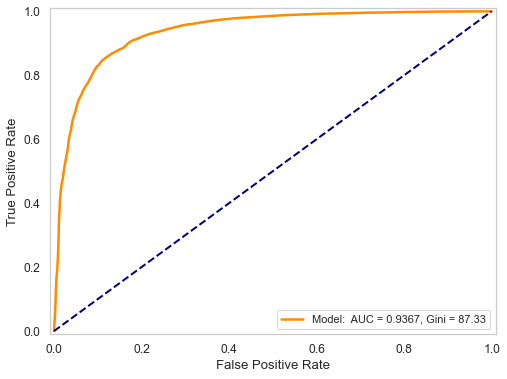

KS is 73.16% at decile 2


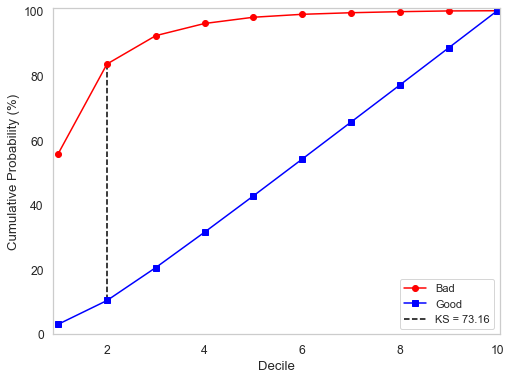

Test set


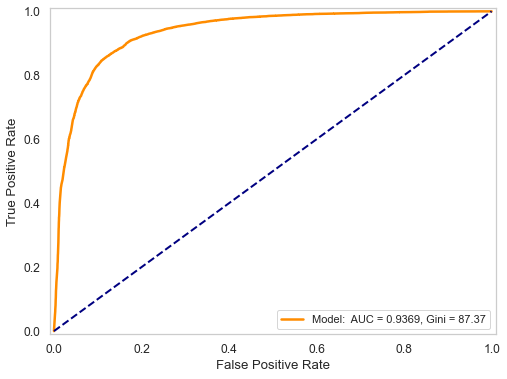

KS is 73.31% at decile 2


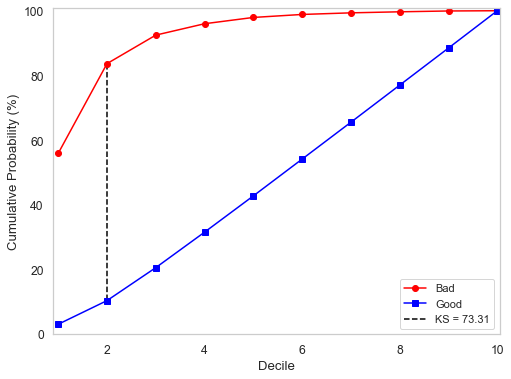

In [172]:
print('Training set')
roc_gini(y_train.values, y_pred_train)
gain_table_train = ks(target=y_train, prob=y_pred_train) 
    
print('Test set')
roc_gini(y_test.values, y_pred_test)
gain_table_test = ks(target=y_test, prob=y_pred_test) 

In [175]:
gain_table_train

,min_prob,max_prob,bad,good,total,cum_bad,cum_total,bad_rate,good_rate,cum_badrate,cum_goodrate,KS,badrate_decile,actual_bad
Decile,,,,,,,,,,,,,,
1,0.556723,0.826948,32327,11483,43810,57954,439850,55.7804%,3.0068%,55.7804%,3.0068%,52.770000,73.7891%,13.18%
2,0.216196,0.556705,16075,28068,44143,25627,396040,27.7375%,7.3496%,83.5180%,10.3565%,73.160000,36.4157%,6.47%
3,0.079383,0.216105,5085,38901,43986,9552,351897,8.7742%,10.1863%,92.2922%,20.5428%,71.750000,11.5605%,2.71%
4,0.030755,0.079379,2179,41818,43997,4467,307911,3.7599%,10.9501%,96.0520%,31.4929%,64.560000,4.9526%,1.45%
5,0.013778,0.030749,1119,42854,43973,2288,263914,1.9308%,11.2214%,97.9829%,42.7142%,55.270000,2.5447%,0.87%
6,0.006672,0.013776,526,43474,44000,1169,219941,0.9076%,11.3837%,98.8905%,54.0980%,44.790000,1.1955%,0.53%
7,0.003558,0.006671,283,43680,43963,643,175941,0.4883%,11.4377%,99.3788%,65.5356%,33.840000,0.6437%,0.37%
8,0.001691,0.003558,191,43723,43914,360,131978,0.3296%,11.4489%,99.7084%,76.9846%,22.720000,0.4349%,0.27%
9,0.000901,0.001691,132,43901,44033,169,88064,0.2278%,11.4955%,99.9362%,88.4801%,11.460000,0.2998%,0.19%


In [176]:
gain_table_test

,min_prob,max_prob,bad,good,total,cum_bad,cum_total,bad_rate,good_rate,cum_badrate,cum_goodrate,KS,badrate_decile,actual_bad
Decile,,,,,,,,,,,,,,
1,0.555427,0.823337,8096,2873,10969,14489,109963,55.8769%,3.0092%,55.8769%,3.0092%,52.870000,73.8080%,13.18%
2,0.216535,0.555053,4022,6983,11005,6393,98994,27.7590%,7.3140%,83.6359%,10.3232%,73.310000,36.5470%,6.46%
3,0.078078,0.216519,1278,9737,11015,2371,87989,8.8205%,10.1986%,92.4563%,20.5218%,71.930000,11.6024%,2.69%
4,0.030405,0.078072,510,10482,10992,1093,76974,3.5199%,10.9789%,95.9763%,31.5007%,64.480000,4.6397%,1.42%
5,0.013700,0.030397,282,10713,10995,583,65982,1.9463%,11.2209%,97.9226%,42.7216%,55.200000,2.5648%,0.88%
6,0.006731,0.013700,134,10868,11002,301,54987,0.9248%,11.3832%,98.8474%,54.1048%,44.740000,1.2180%,0.55%
7,0.003563,0.006730,72,10891,10963,167,43985,0.4969%,11.4073%,99.3443%,65.5121%,33.830000,0.6568%,0.38%
8,0.001698,0.003561,47,10956,11003,95,33022,0.3244%,11.4754%,99.6687%,76.9875%,22.680000,0.4272%,0.29%
9,0.000903,0.001698,37,10958,10995,48,22019,0.2554%,11.4775%,99.9241%,88.4649%,11.460000,0.3365%,0.22%


## Summary overall of model

In [177]:
def summary_model(IV, vif, summary):
    
    summary_model = IV.merge(vif, left_on= 'Feature', right_on='Feature').merge(lr_summary ,on='Feature')
    summary_model = summary_model.rename(columns={'P>|z|': "p-value", "VIF Factor": "vif", "IV":"iv"})
    ### Calculate feature importance ###
    summary_model['feature_importance'] = (summary_model['coef'].abs()/summary_model['coef'].abs().sum())*100
    
    return summary_model

In [178]:
summary = summary_model(IV, vif, lr_summary)
summary

,Feature,iv,Predictive_Power,vif,coef,std err,z,p-value,[0.025,0.975],feature_importance
0,ACR,2.819708,Suspicious,1.951275,0.772600,0.005000,160.449000,0.000000,0.763000,0.782000,26.319196
1,AGE_CID,1.953576,Suspicious,1.342208,0.799600,0.005000,148.382000,0.000000,0.789000,0.810000,27.238971
2,LAST_PAYMENT_DATE_DAY,1.513272,Suspicious,1.807462,0.214800,0.006000,34.669000,0.000000,0.203000,0.227000,7.317322
3,TERM_MNTH,0.199160,Medium,1.183934,0.025400,0.014000,1.805000,0.071000,-0.002000,0.053000,0.865270
4,DEP_BAL,0.528146,Suspicious,3.989052,0.288700,0.017000,17.241000,0.000000,0.256000,0.322000,9.834781
5,DEP_CNT_PRD,0.093440,Weak,1.135765,0.433400,0.022000,20.025000,0.000000,0.391000,0.476000,14.764095
6,DEP_BAL_AVG3M,0.625634,Suspicious,4.102109,0.356600,0.016000,22.699000,0.000000,0.326000,0.387000,12.147845
7,PER_GAP_UTL,0.137107,Medium,1.114259,-0.044400,0.017000,-2.572000,0.010000,-0.078000,-0.011000,1.512519


## Model tuning

In [180]:
summary['Feature'].loc[summary['p-value']>0.05].to_list()

['TERM_MNTH']

In [179]:
X.columns

Index(['woe_ACR', 'woe_AGE_CID', 'woe_LAST_PAYMENT_DATE_DAY', 'woe_TERM_MNTH',
       'woe_DEP_BAL', 'woe_DEP_CNT_PRD', 'woe_DEP_BAL_AVG3M',
       'woe_PER_GAP_UTL'],
      dtype='object')

In [201]:
drop_columns=['woe_TERM_MNTH', 'woe_DEP_BAL','woe_PER_GAP_UTL']
X_2 = X.drop(drop_columns, axis=1)
y_2 = df_woe['TARGET_NPL']

In [191]:
X_2.head()

,woe_ACR,woe_AGE_CID,woe_LAST_PAYMENT_DATE_DAY,woe_DEP_CNT_PRD,woe_DEP_BAL_AVG3M
1,1.851059,-0.963114,1.373019,0.214391,0.180319
3,-0.088759,0.403661,1.373019,0.034519,-0.800367
6,1.851059,1.578595,1.373019,0.214391,0.180319
14,1.851059,0.403661,1.373019,0.034519,0.523707
15,1.851059,1.578595,-0.153570,0.214391,0.593877


In [192]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=99, stratify=y)

In [193]:
lr_2, lr_2_summary = train_model(X_train_2, y_train_2)

Optimization terminated successfully.
         Current function value: 0.201324
         Iterations 9


In [194]:
y_pred_train_2 = lr_2.predict(sm.add_constant(X_train_2))
y_pred_test_2 = lr_2.predict(sm.add_constant(X_test_2))

Training set


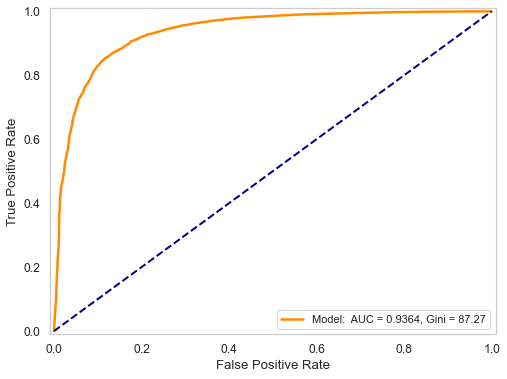

KS is 72.89999999999999% at decile 2


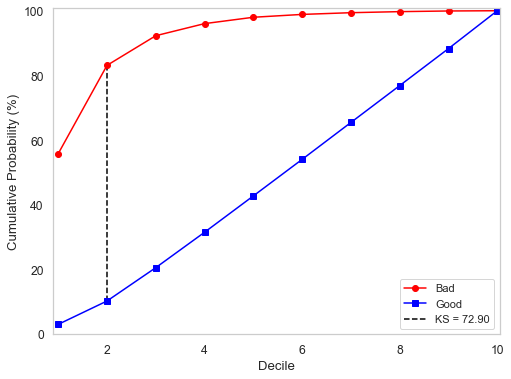

Test set


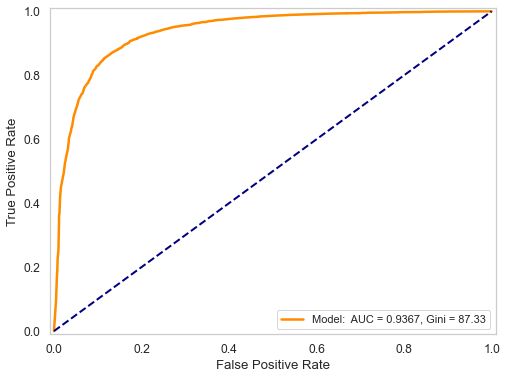

KS is 72.98% at decile 2


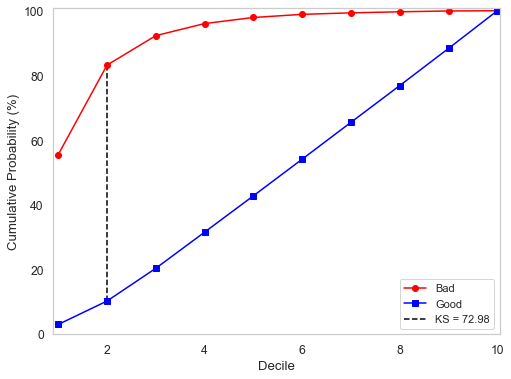

In [195]:
print('Training set')
roc_gini(y_train_2.values, y_pred_train_2)
gain_table_train_2 = ks(target=y_train_2, prob=y_pred_train_2)

print('Test set')
roc_gini(y_test_2.values, y_pred_test_2)
gain_table_test_2 = ks(target=y_test_2, prob=y_pred_test_2)

In [196]:
vif_2 = vif_calculation(X_2)
vif_2

,Feature,VIF Factor
0,ACR,1.759883
1,AGE_CID,1.139000
2,LAST_PAYMENT_DATE_DAY,1.767277
3,DEP_CNT_PRD,1.129418
4,DEP_BAL_AVG3M,1.217479
5,const,1.536813


In [199]:
summary_2 = summary_model(IV, vif_2, lr_2_summary)
summary_2.sort_values(by='feature_importance', ascending=False)

,Feature,iv,Predictive_Power,vif,coef,std err,z,p-value,[0.025,0.975],feature_importance
1,AGE_CID,1.953576,Suspicious,1.139000,0.799600,0.005000,148.382000,0.000000,0.789000,0.810000,31.028328
0,ACR,2.819708,Suspicious,1.759883,0.772600,0.005000,160.449000,0.000000,0.763000,0.782000,29.980598
3,DEP_CNT_PRD,0.093440,Weak,1.129418,0.433400,0.022000,20.025000,0.000000,0.391000,0.476000,16.818005
4,DEP_BAL_AVG3M,0.625634,Suspicious,1.217479,0.356600,0.016000,22.699000,0.000000,0.326000,0.387000,13.837796
2,LAST_PAYMENT_DATE_DAY,1.513272,Suspicious,1.767277,0.214800,0.006000,34.669000,0.000000,0.203000,0.227000,8.335274


## Final logistic regression model

Optimization terminated successfully.
         Current function value: 0.201225
         Iterations 9


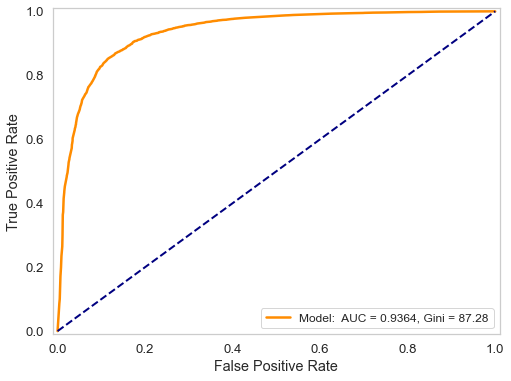

KS is 72.88% at decile 2


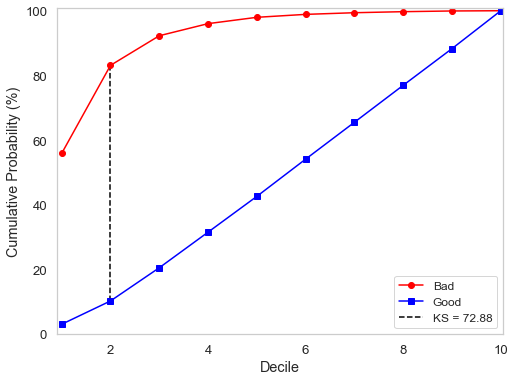

************************************************************
              precision    recall  f1-score   support

        Good       0.94      0.96      0.95    477370
         Bad       0.72      0.61      0.66     72443

    accuracy                           0.92    549813
   macro avg       0.83      0.79      0.81    549813
weighted avg       0.91      0.92      0.91    549813



In [202]:
X = df_woe.loc[:, df_woe.columns.str.startswith('woe_')]
y = df_woe['TARGET_NPL']

X_final = X.drop(drop_columns, axis=1)
y_final = y

df_grade = df_woe.copy()
threshold = 0.5

final_model = sm.Logit(y_final, sm.add_constant(X_final)).fit(disp=True, maxiter=100, intercept=True)

df_grade['pd'] = final_model.predict(sm.add_constant(X_final))
df_grade['prediction'] = np.where(df_grade['pd'] >= threshold, 1, 0)

sns.set(font_scale=1.2)
sns.set_style("whitegrid")

roc_gini(y_final.values, df_grade['pd'].values)
gain_table_final = ks(target=y_final, prob=df_grade['pd'])
print('*'*60)
target_names = ['Good', 'Bad']
print(classification_report(y_final.values, df_grade['prediction'].values, target_names=target_names))